In [1]:
# import dependencies
%matplotlib inline
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler

In [3]:
# read in csv as pandas dataframe
df = pd.read_csv(Path('resources/outliers-removed_spaces-removed.csv'))
df

,Year,Full Name,Age,Salary,ERA,Hits,ER,SO,HR,Wins,Losses,OP,BFP,GF,Weight,Height,League,Team,GS
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344,2016,WoodAlex,25,530000,3.73,56,25,66,5,1,4,181,255,0,215,76,NL,LAN,10
4345,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4
4346,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12
4347,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24


In [4]:
df['LogSal']=np.log10(df['Salary'])
df

,Year,Full Name,Age,Salary,ERA,Hits,ER,SO,HR,Wins,Losses,OP,BFP,GF,Weight,Height,League,Team,GS,LogSal
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33,5.267172
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7,5.000000
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3,5.000000
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31,5.477121
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344,2016,WoodAlex,25,530000,3.73,56,25,66,5,1,4,181,255,0,215,76,NL,LAN,10,5.724276
4345,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4,6.414973
4346,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12,5.707996
4347,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24,5.711385


In [5]:
# Split our preprocessed data into our features and target arrays
y = df['LogSal'].values
X = df.drop(['Salary','Year','Full Name','Height','Weight','League','Team','LogSal'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# Create the model and fit the model to the data
model = LinearRegression()
model

LinearRegression()

In [7]:
# Fit the model to the training data, and calculate the scores for the training and testing data.

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score*100:.2f}%")
print(f"Testing Score: {testing_score*100:.2f}%")

Training Score: 41.06%
Testing Score: 42.53%


In [8]:
# Score the prediction with MSE and R2
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error (MSE): {mse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

mean squared error (MSE): 0.19
R-squared (R2 ): 0.43


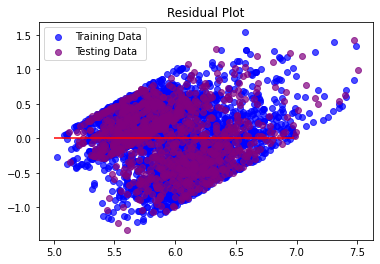

In [9]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data", alpha=0.7)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="purple", label="Testing Data", alpha=0.7)
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max(),color="red")
plt.title("Residual Plot")
plt.show()